# Tests on Alanine Dipeptide

A 10 ns trajectory of alanine dipeptide at 500 K is used here as input.

In [2]:
from deep_cartograph.run import deep_cartograph
from IPython.display import Image, display
from typing import Literal
import logging
import shutil
import yaml
import os

# Set logging level
logging.basicConfig(level=logging.INFO)

def ramachandranize_cv(output_folder: str, model_name: str):   
    """
    Project CV onto ramachandran space
    """

    # Find csv with projected trajectory onto CV

    # Find csv with projected trajectory onto phi psi

    # Plot phi psi samples coloring with CV values

def run_deep_cartograph(features: Literal['torsions', 'distances']):

    # Input configuration
    config_path = f"../../data/alanine_dipeptide/input/{features}_config.yml"

    with open(config_path) as config_file:
        configuration = yaml.load(config_file, Loader = yaml.FullLoader)

    # Input trajectory and topology
    input_path = "../../data/alanine_dipeptide/input/"
    traj_path = os.path.join(input_path, 'alanine_dipeptide.xtc')
    top_path = os.path.join(input_path, 'alanine_dipeptide.pdb')
        
    # Output folder
    output_folder = f"../../data/alanine_dipeptide/output/{features}"

    # Clean output folder
    if os.path.exists(output_folder):
        shutil.rmtree(output_folder)

    # Run workflow 
    deep_cartograph(
        configuration = configuration,
        trajectory = traj_path,
        topology = top_path,
        output_folder = output_folder)

def show_results(features: Literal['torsions', 'distances'], model_name: str):

    # Output folder
    output_folder = f"../../data/alanine_dipeptide/output/{features}"
    
    # Training folder
    training_folder = os.path.join(output_folder, 'train_colvars')

    # Model folder
    model_folder = os.path.join(training_folder, model_name)

    # Paths to images
    loss = os.path.join(model_folder, 'loss.png')
    eigenvalues = os.path.join(model_folder, 'eigenvalues.png')
    trajectory_clustered = os.path.join(model_folder, 'trajectory_clustered.png')
    trajectory = os.path.join(model_folder, 'trajectory.png')
    fes = os.path.join(model_folder, 'fes/fes.png')
    paths = [loss, eigenvalues, trajectory_clustered, trajectory, fes]

    # Instantiate Image objects
    images = [Image(filename=path, width=500) for path in paths if os.path.exists(path)]

    # Display images
    display(*images)

In [3]:
run_deep_cartograph('torsions')

INFO:deep_cartograph:================
INFO:deep_cartograph:Compute features
INFO:deep_cartograph:================
INFO:deep_cartograph:Trajectory file: ../../data/alanine_dipeptide/input/alanine_dipeptide.xtc
/shared/work/pnavarro/envs/deep_cartograph/lib/python3.10/site-packages/MDAnalysis/topology/PDBParser.py:317: UserWarning: Element information is missing, elements attribute will not be populated. If needed these can be guessed using MDAnalysis.topology.guessers.
  warnings.warn("Element information is missing, elements attribute "
/shared/work/pnavarro/envs/deep_cartograph/lib/python3.10/site-packages/MDAnalysis/coordinates/PDB.py:1078: UserWarning: Found no information for attr: 'elements' Using default value of ' '
  warnings.warn("Found no information for attr: '{}'"
INFO:deep_cartograph.modules.plumed.input_file.input_file:Found 14 features for tor
INFO:deep_cartograph.modules.plumed.utils:Executing PLUMED driver command: ml PLUMED/2.9.0-intel-2021b && unset I_MPI_PMI_LIBRARY

<Figure size 640x480 with 0 Axes>

<Figure size 500x400 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 500x400 with 0 Axes>

<Figure size 500x400 with 0 Axes>

<Figure size 640x480 with 0 Axes>

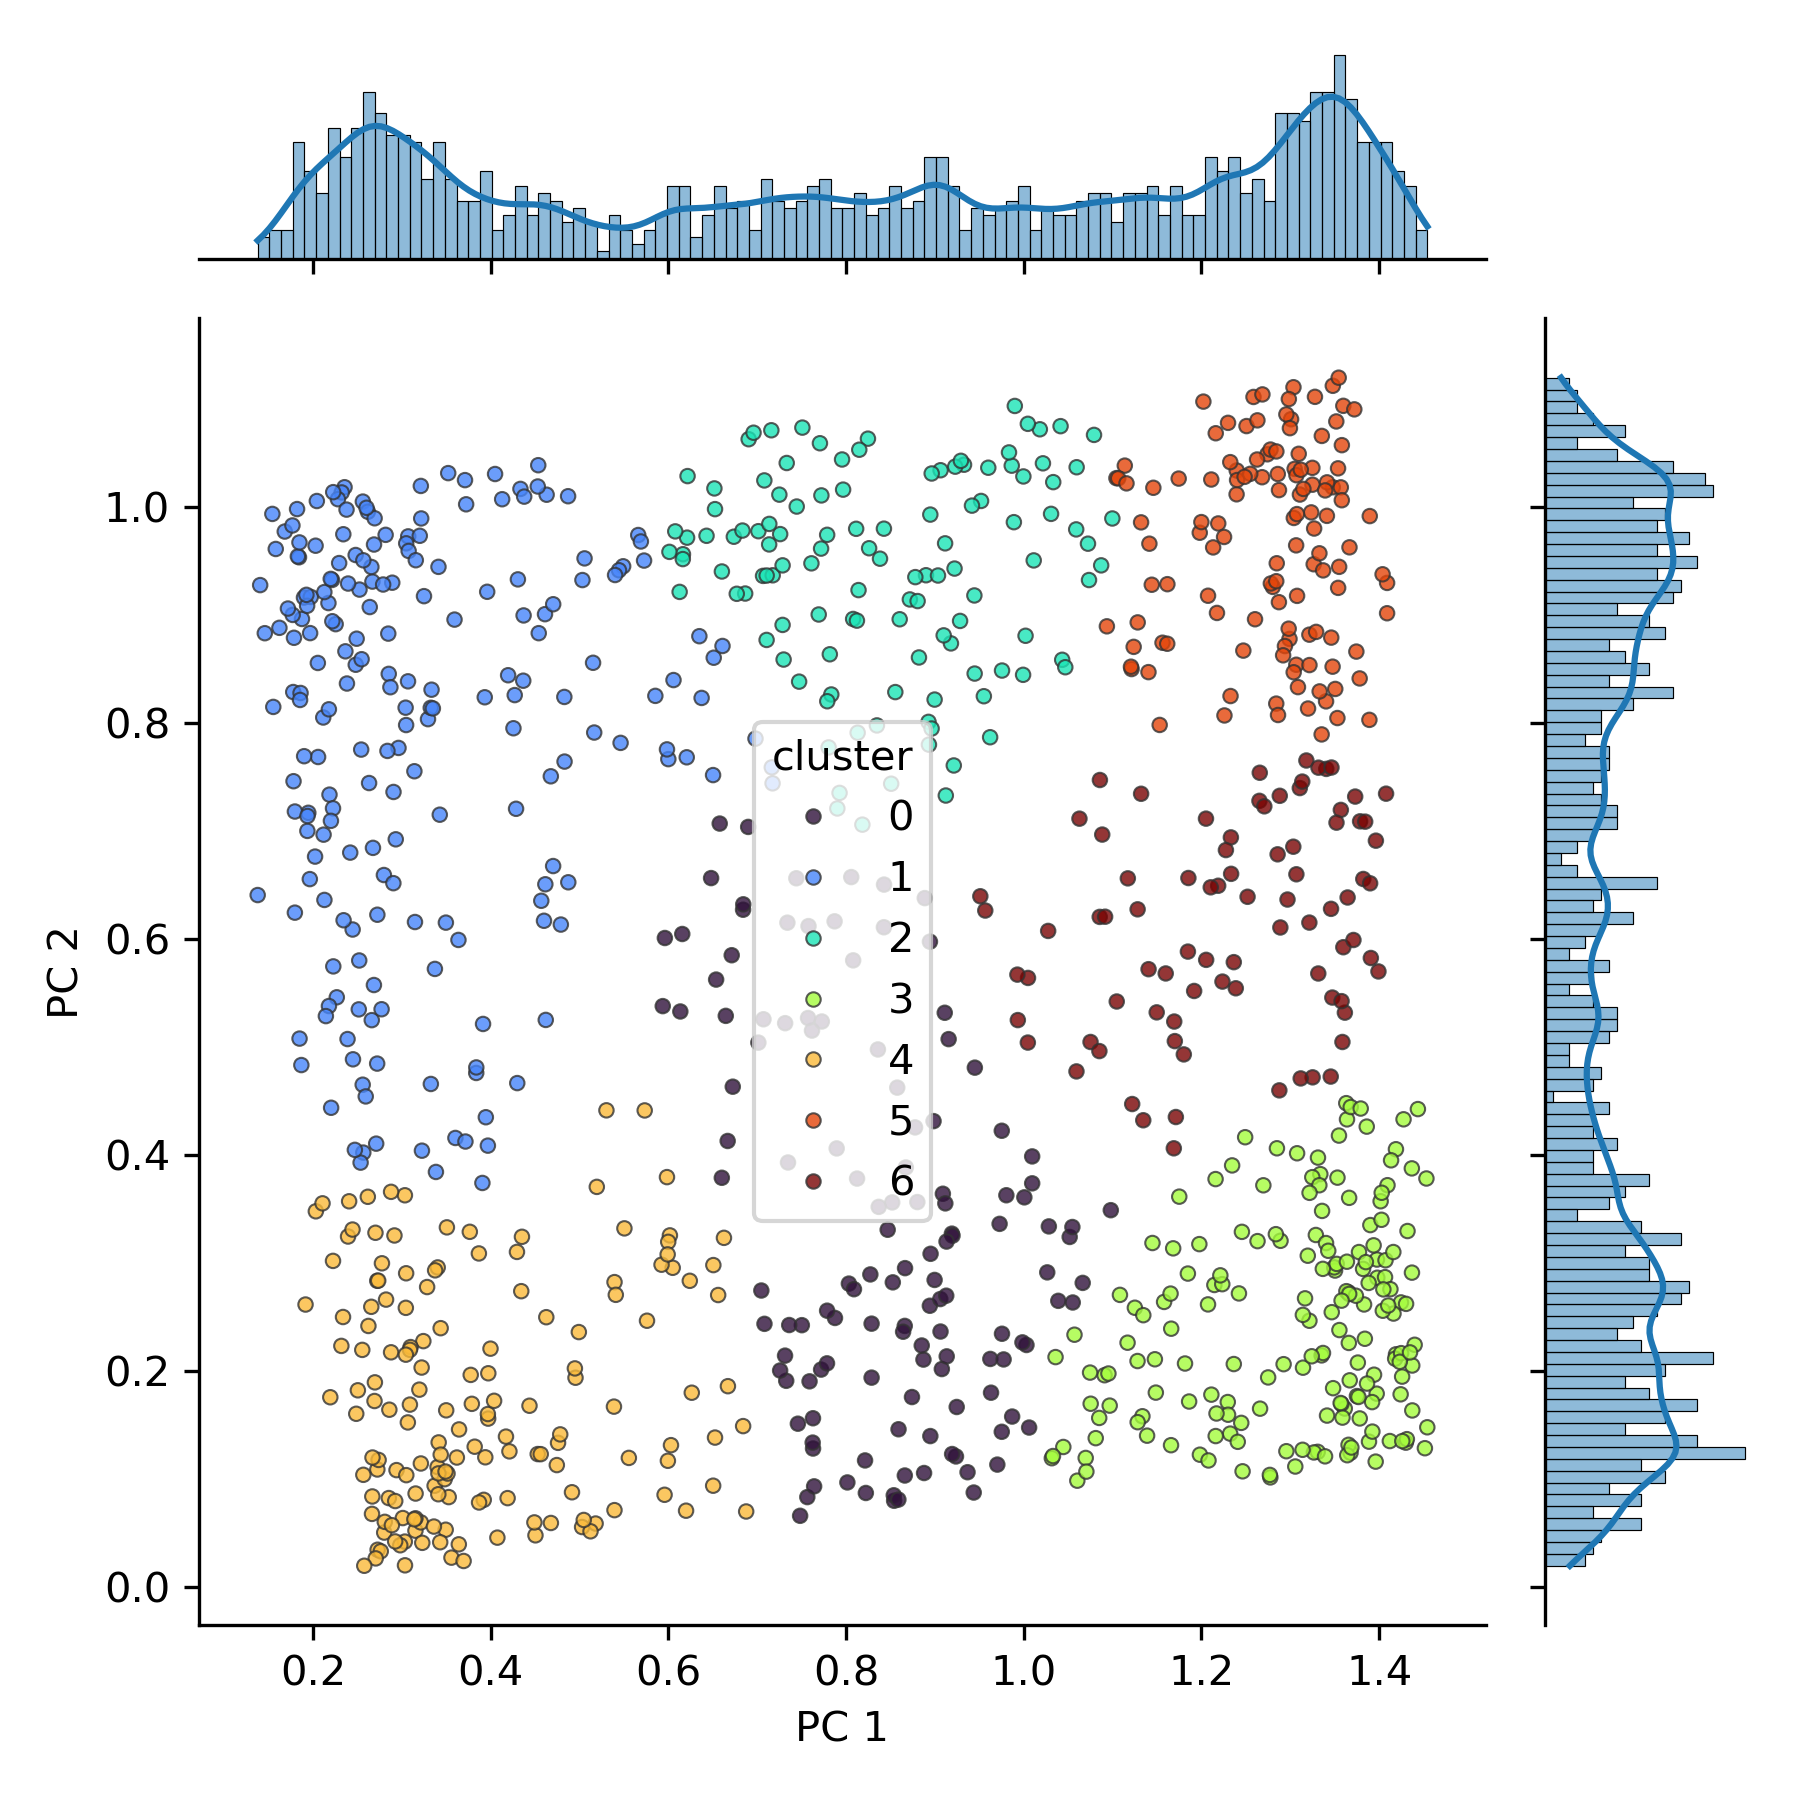

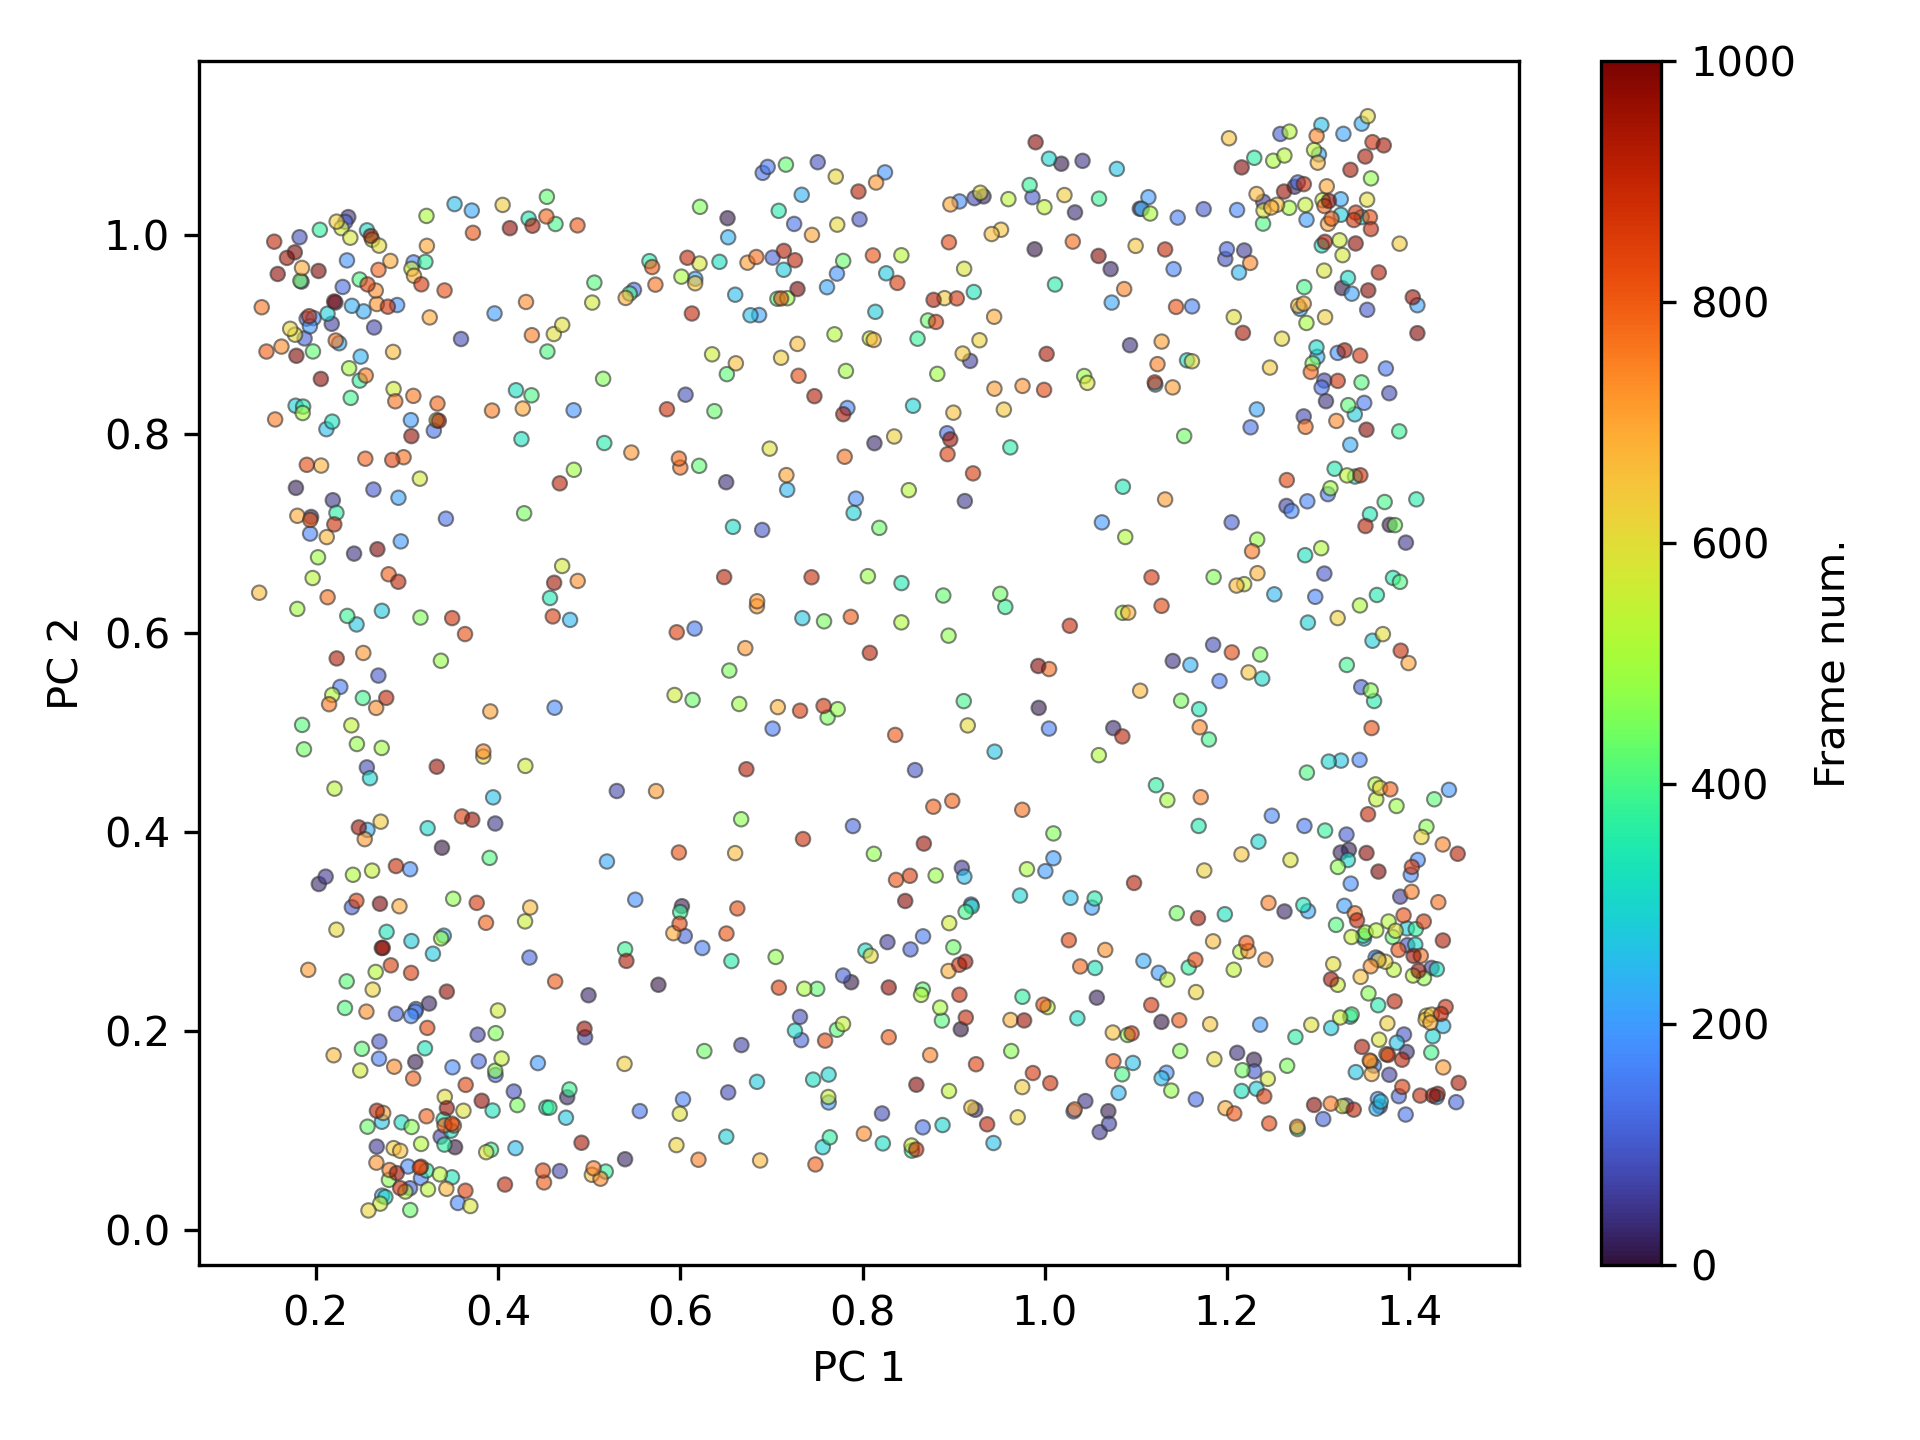

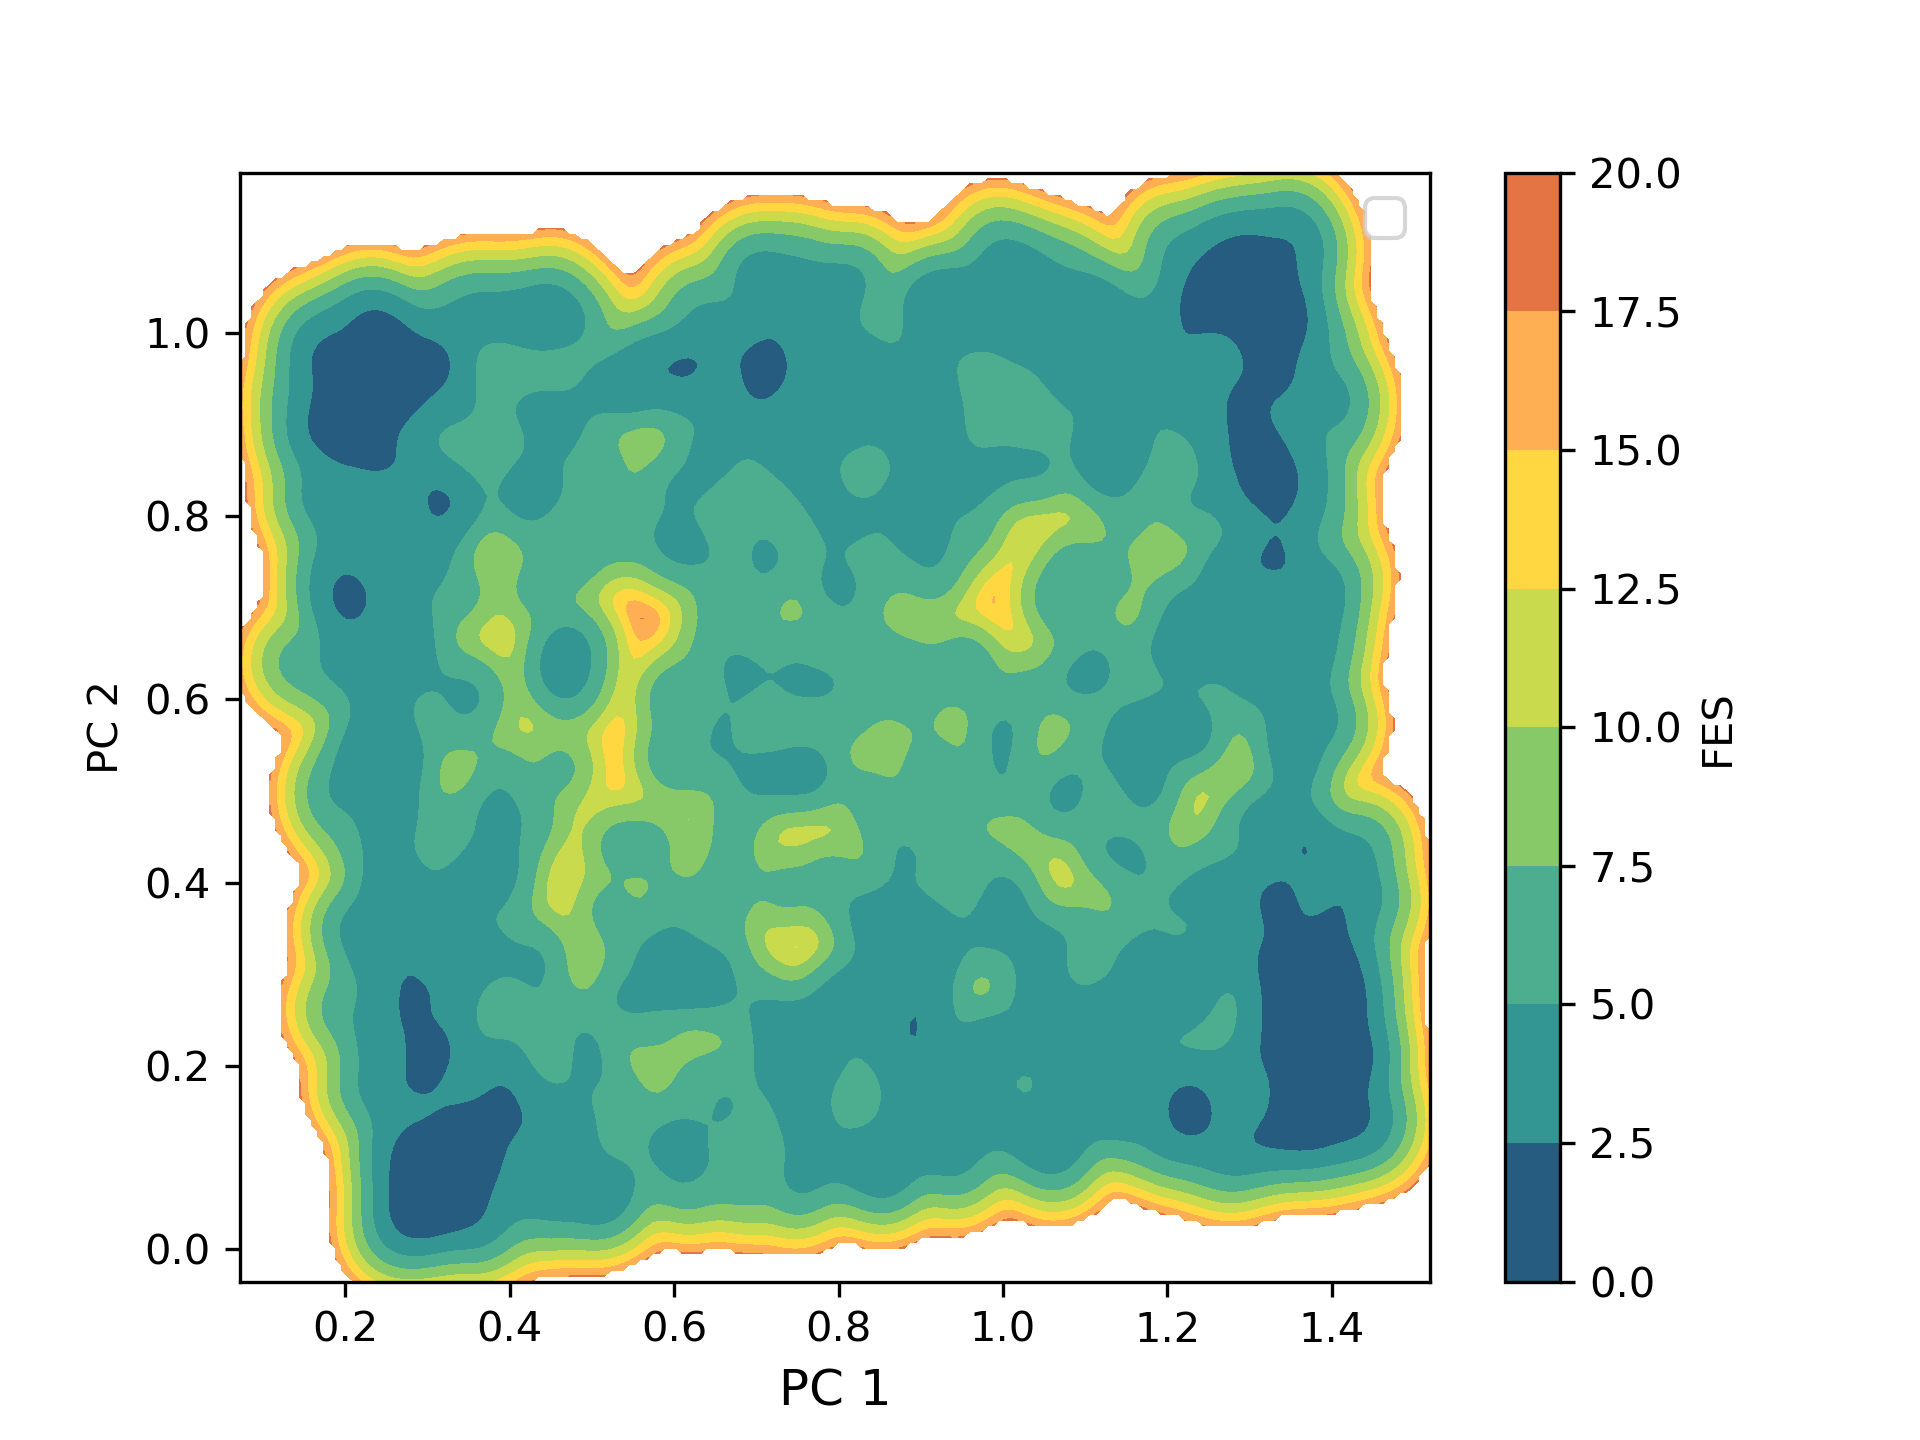

In [4]:
show_results('torsions', 'pca')

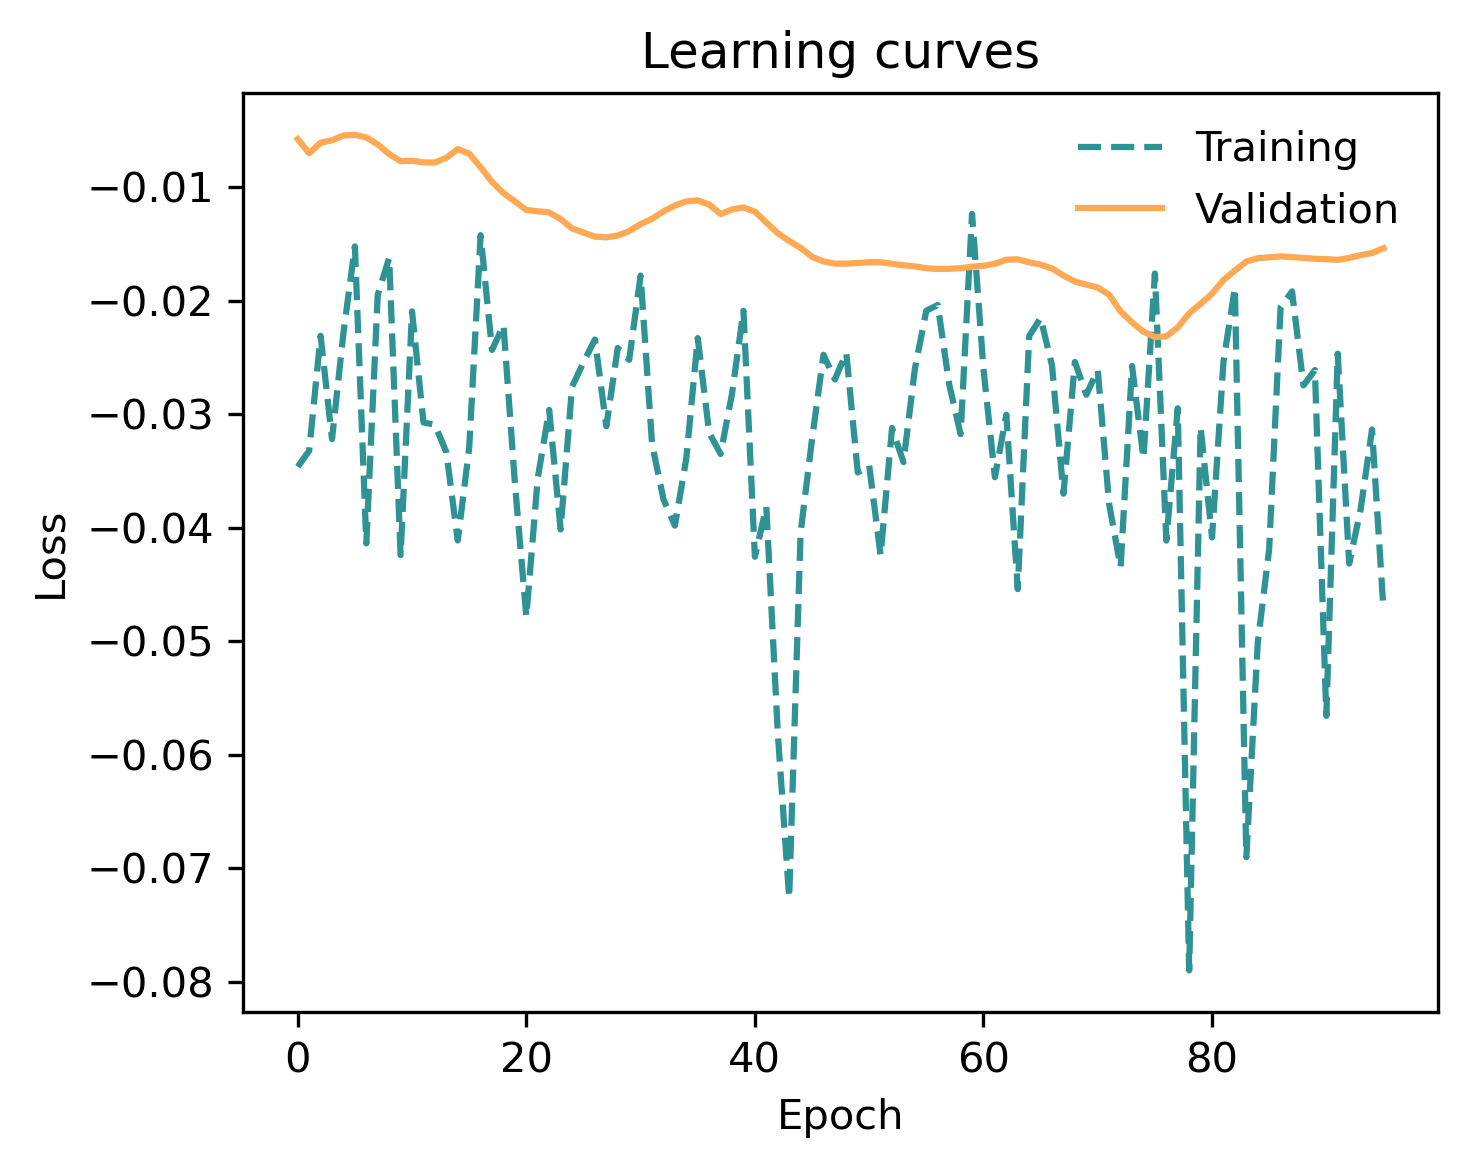

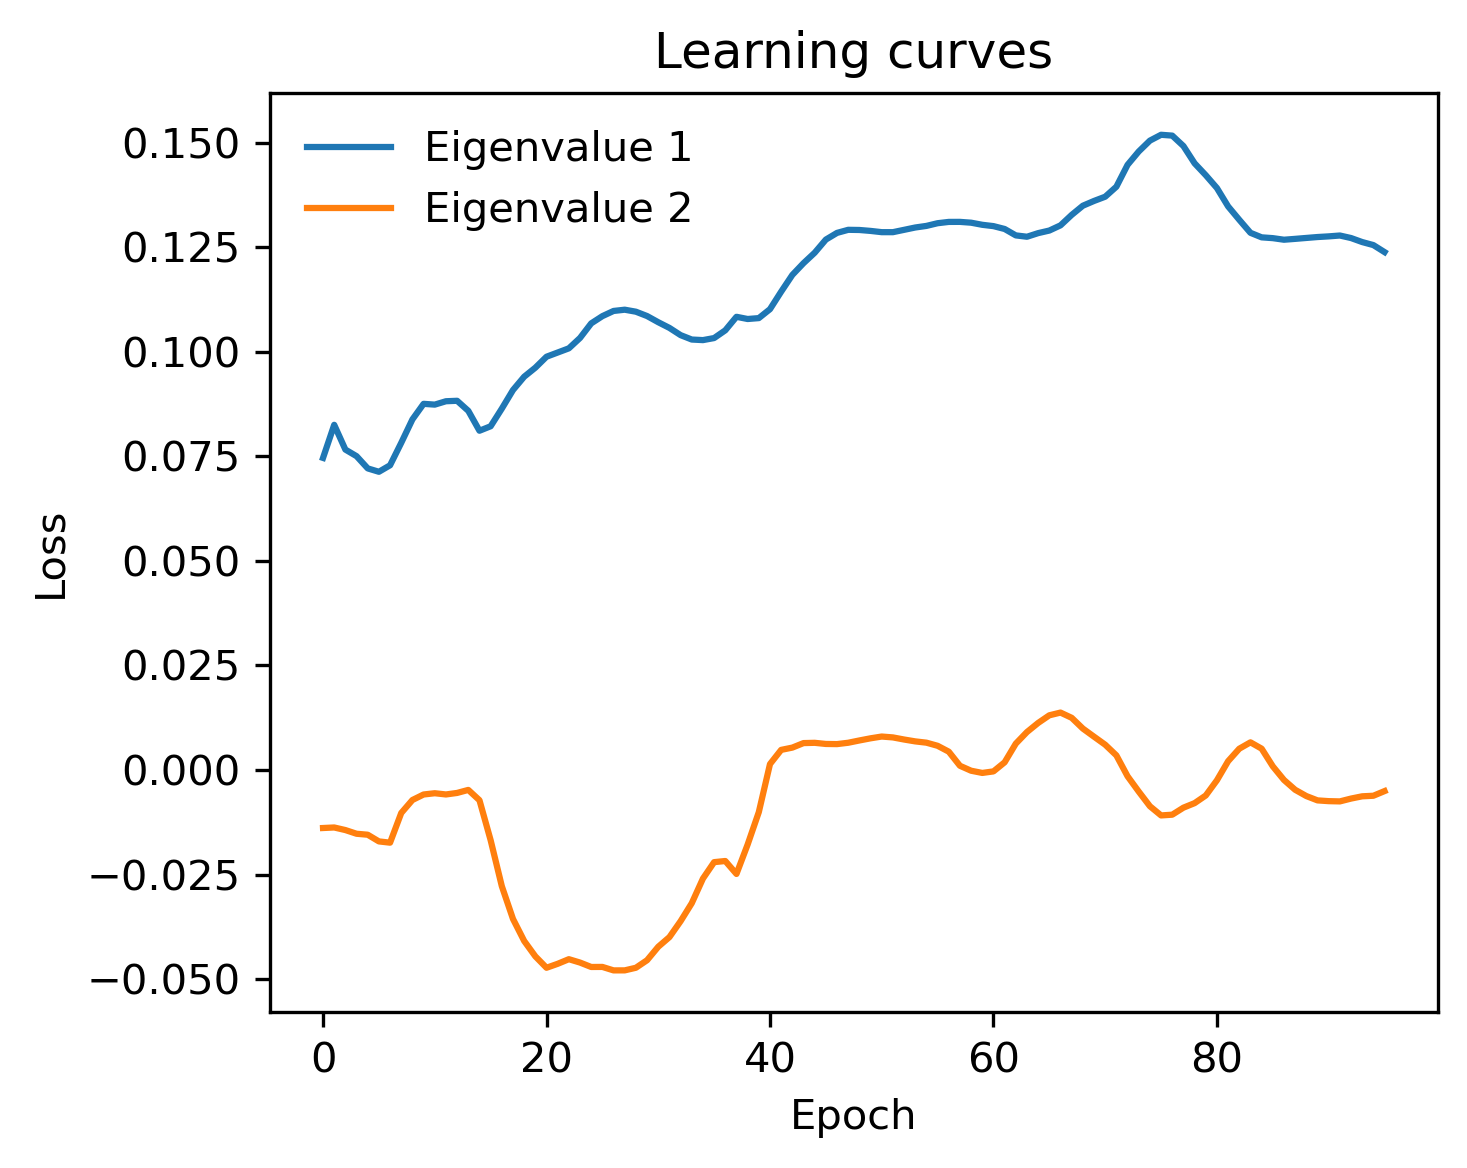

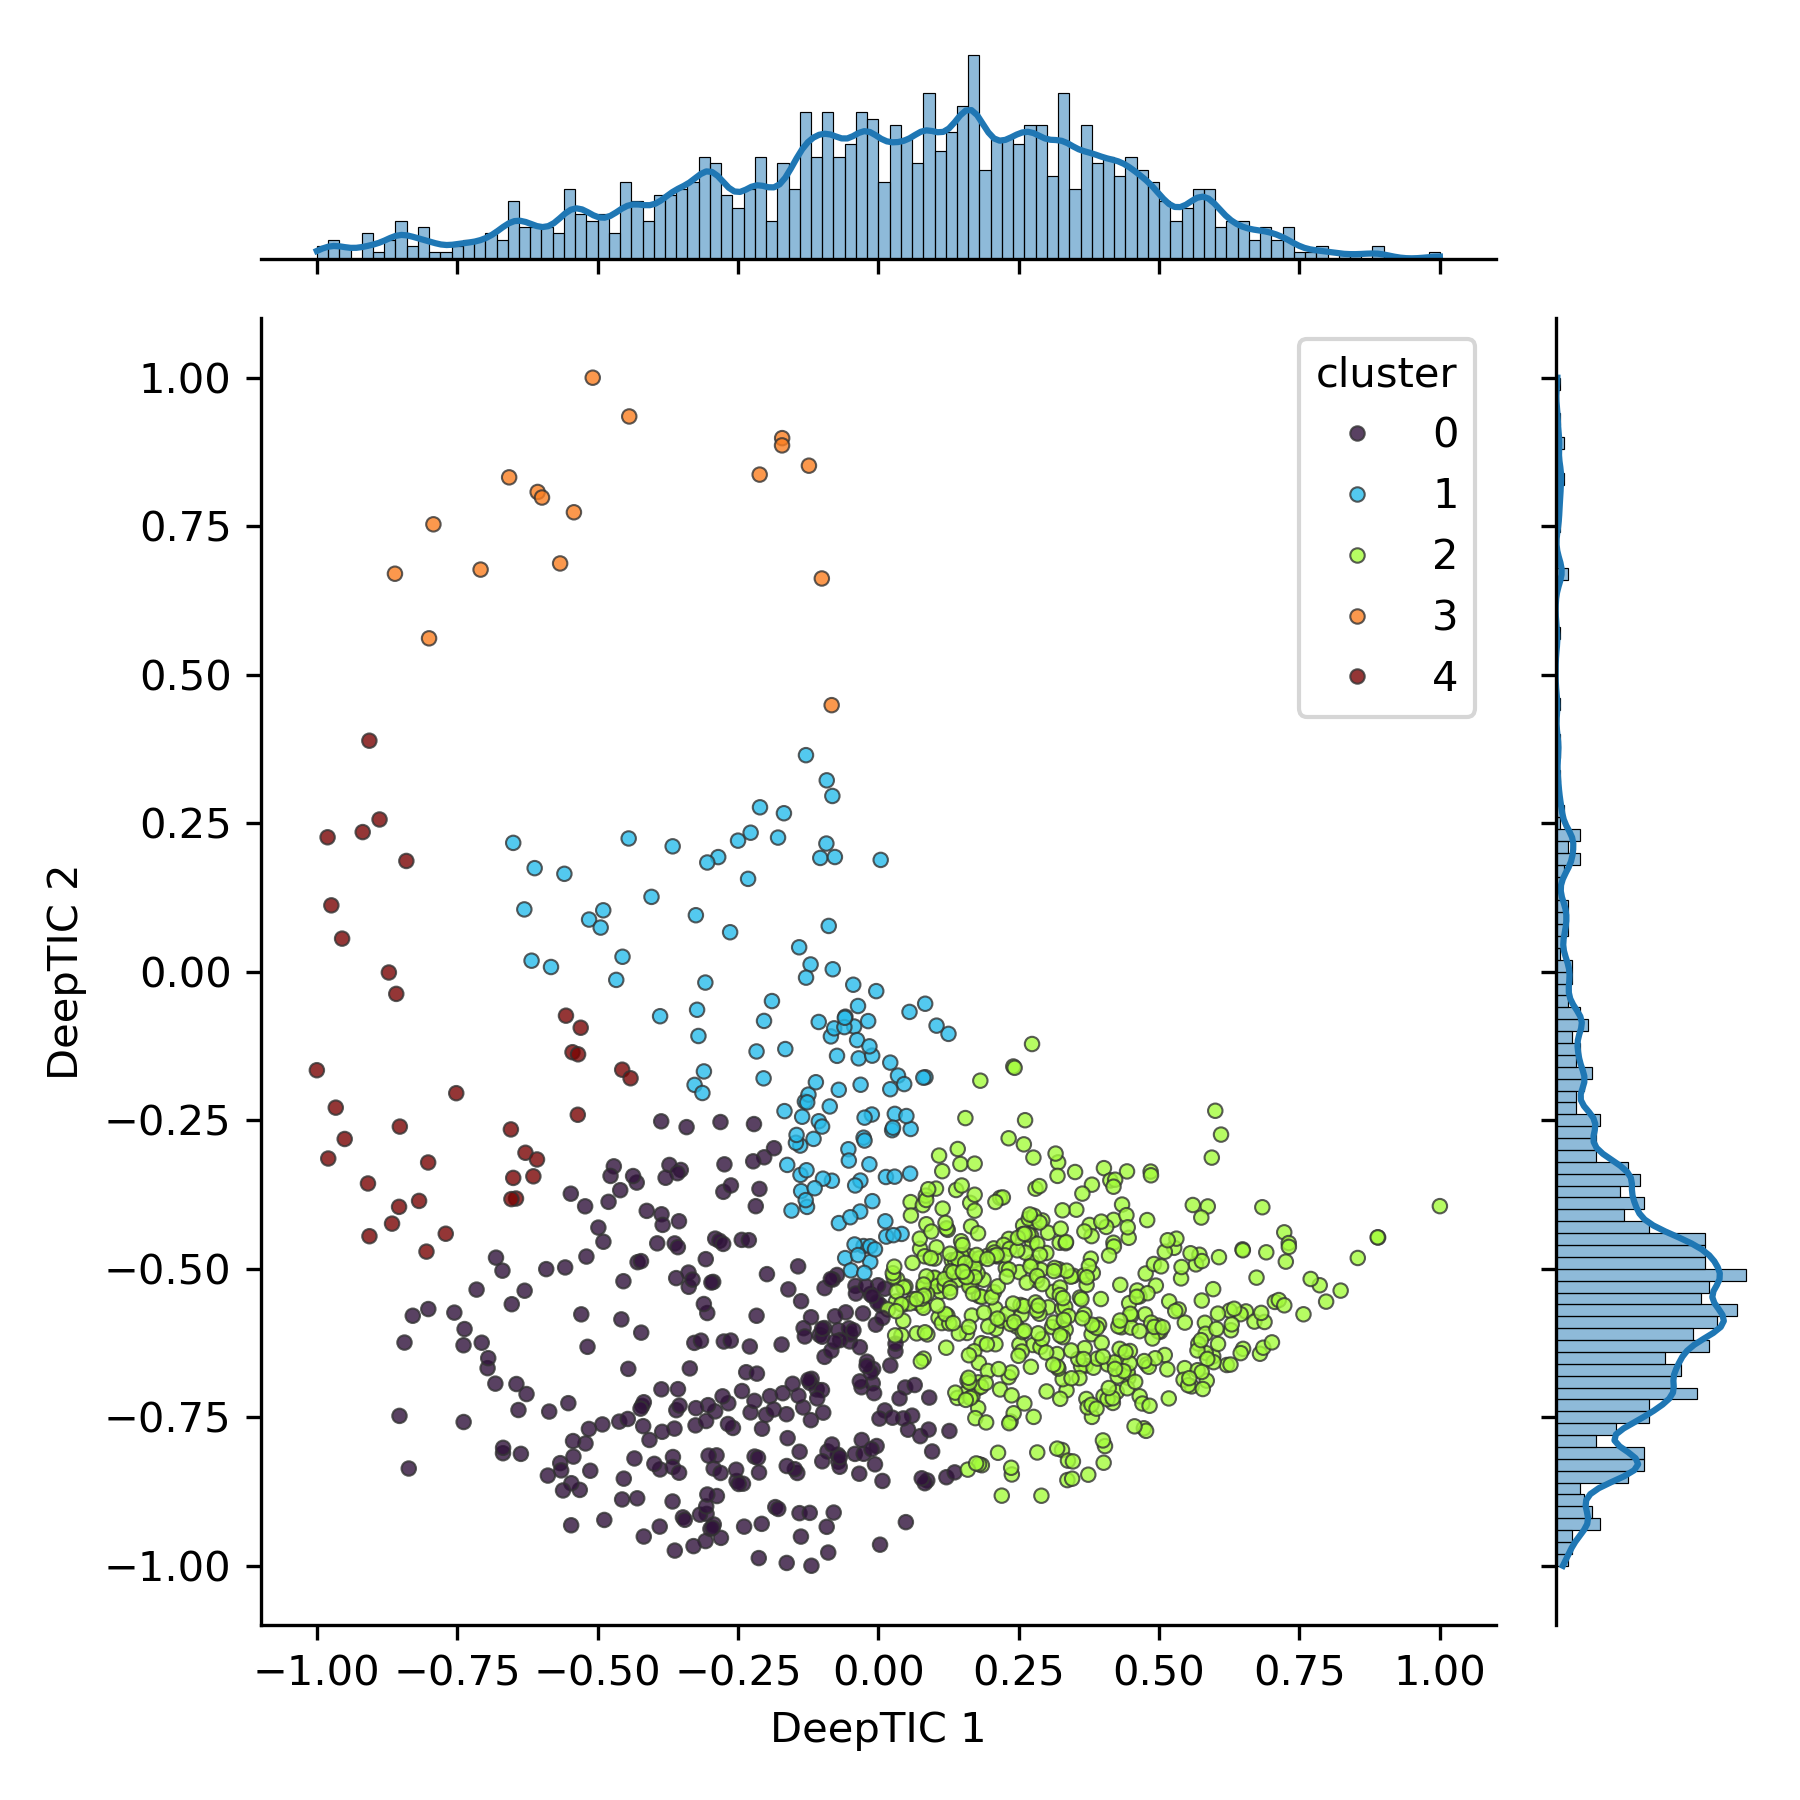

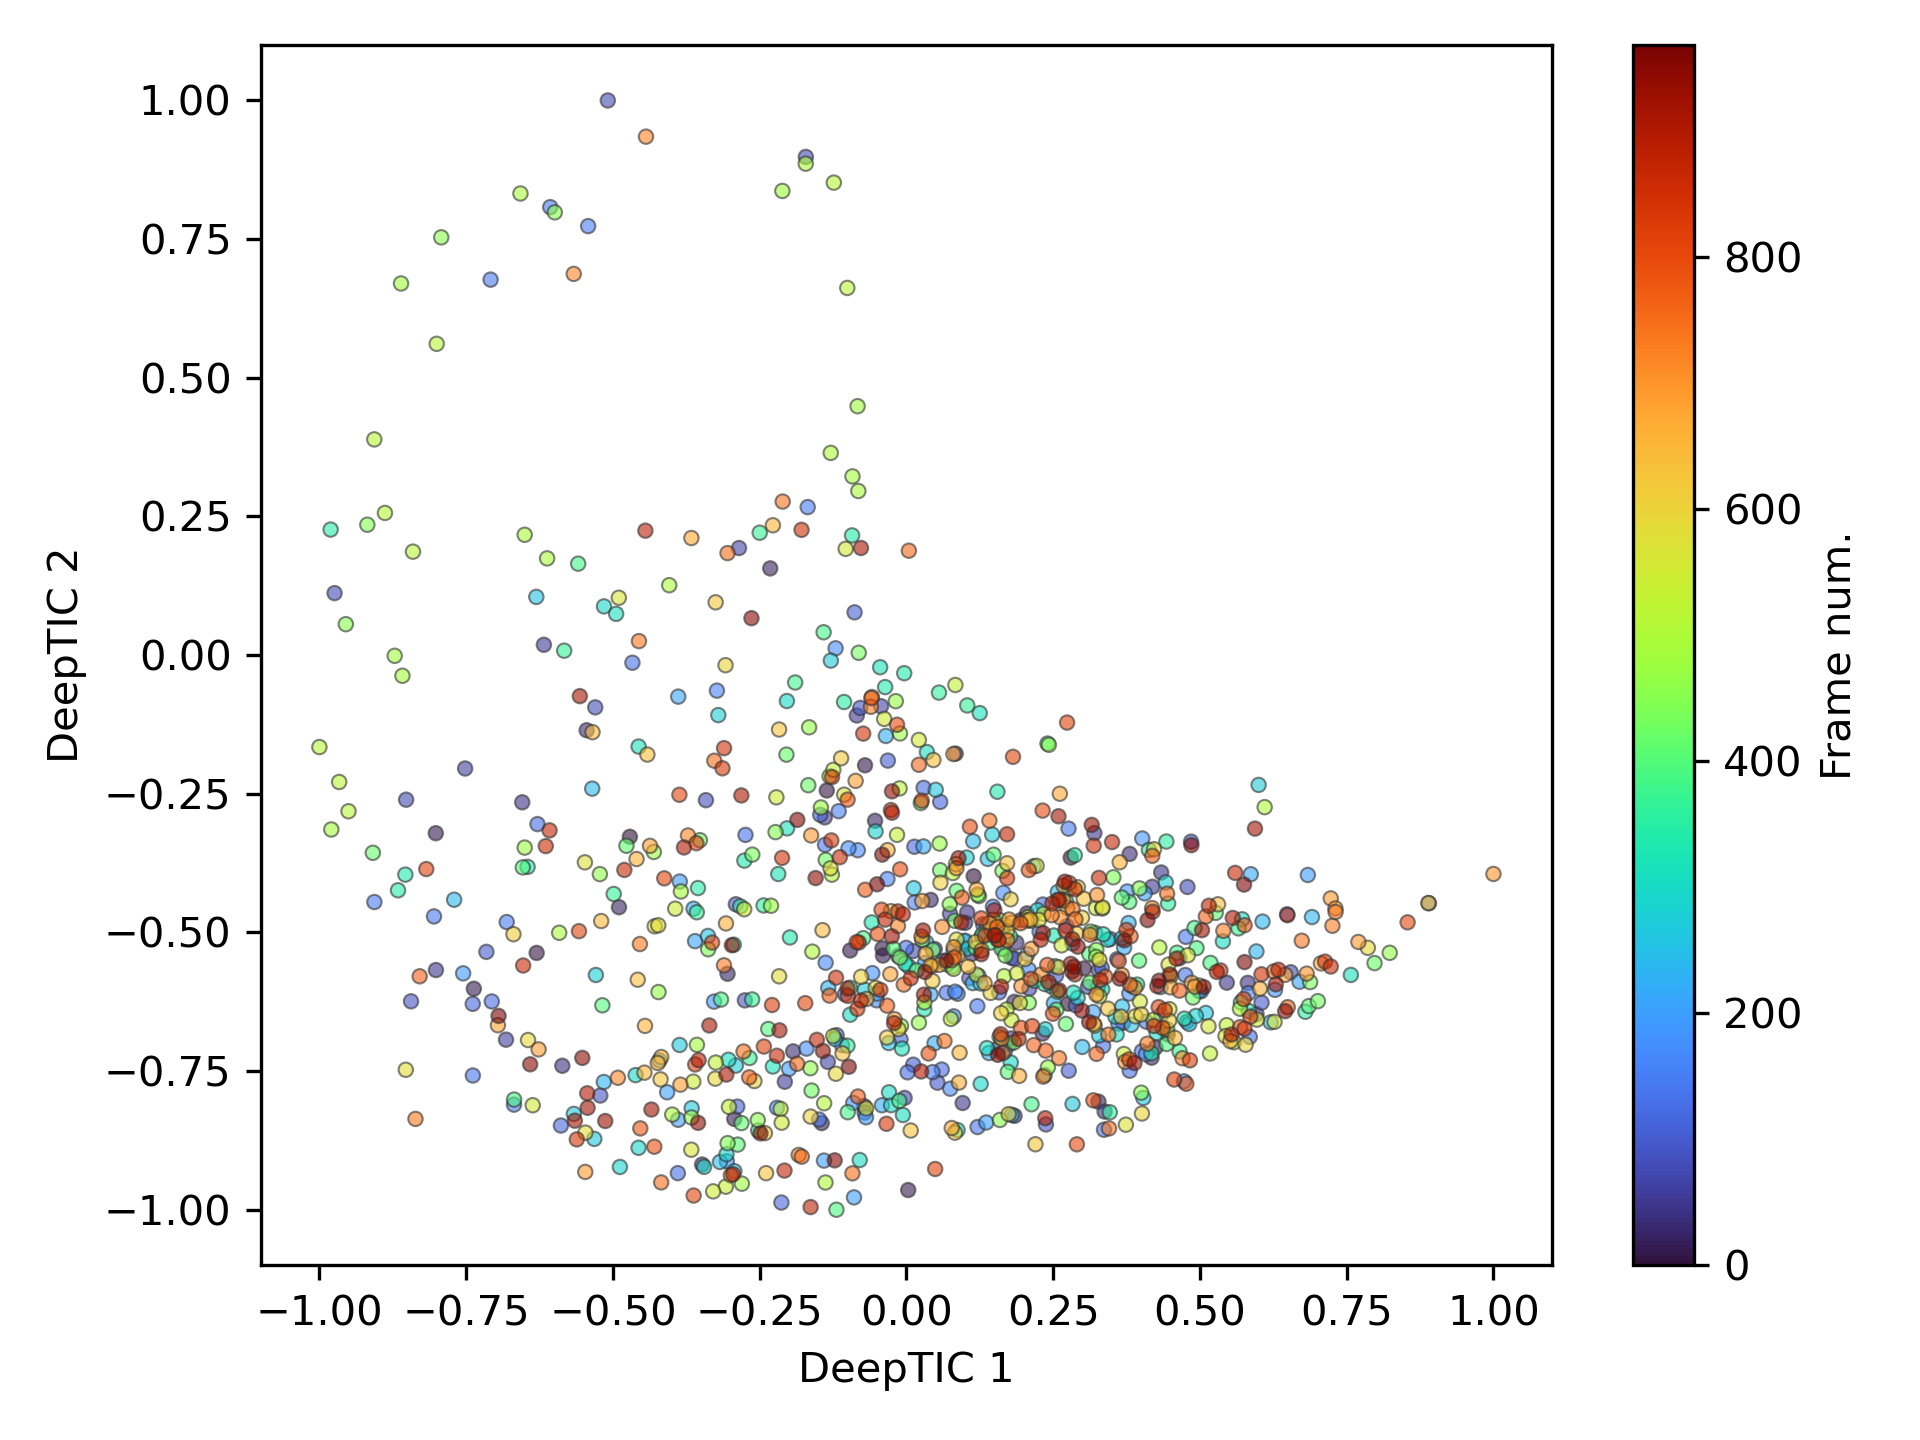

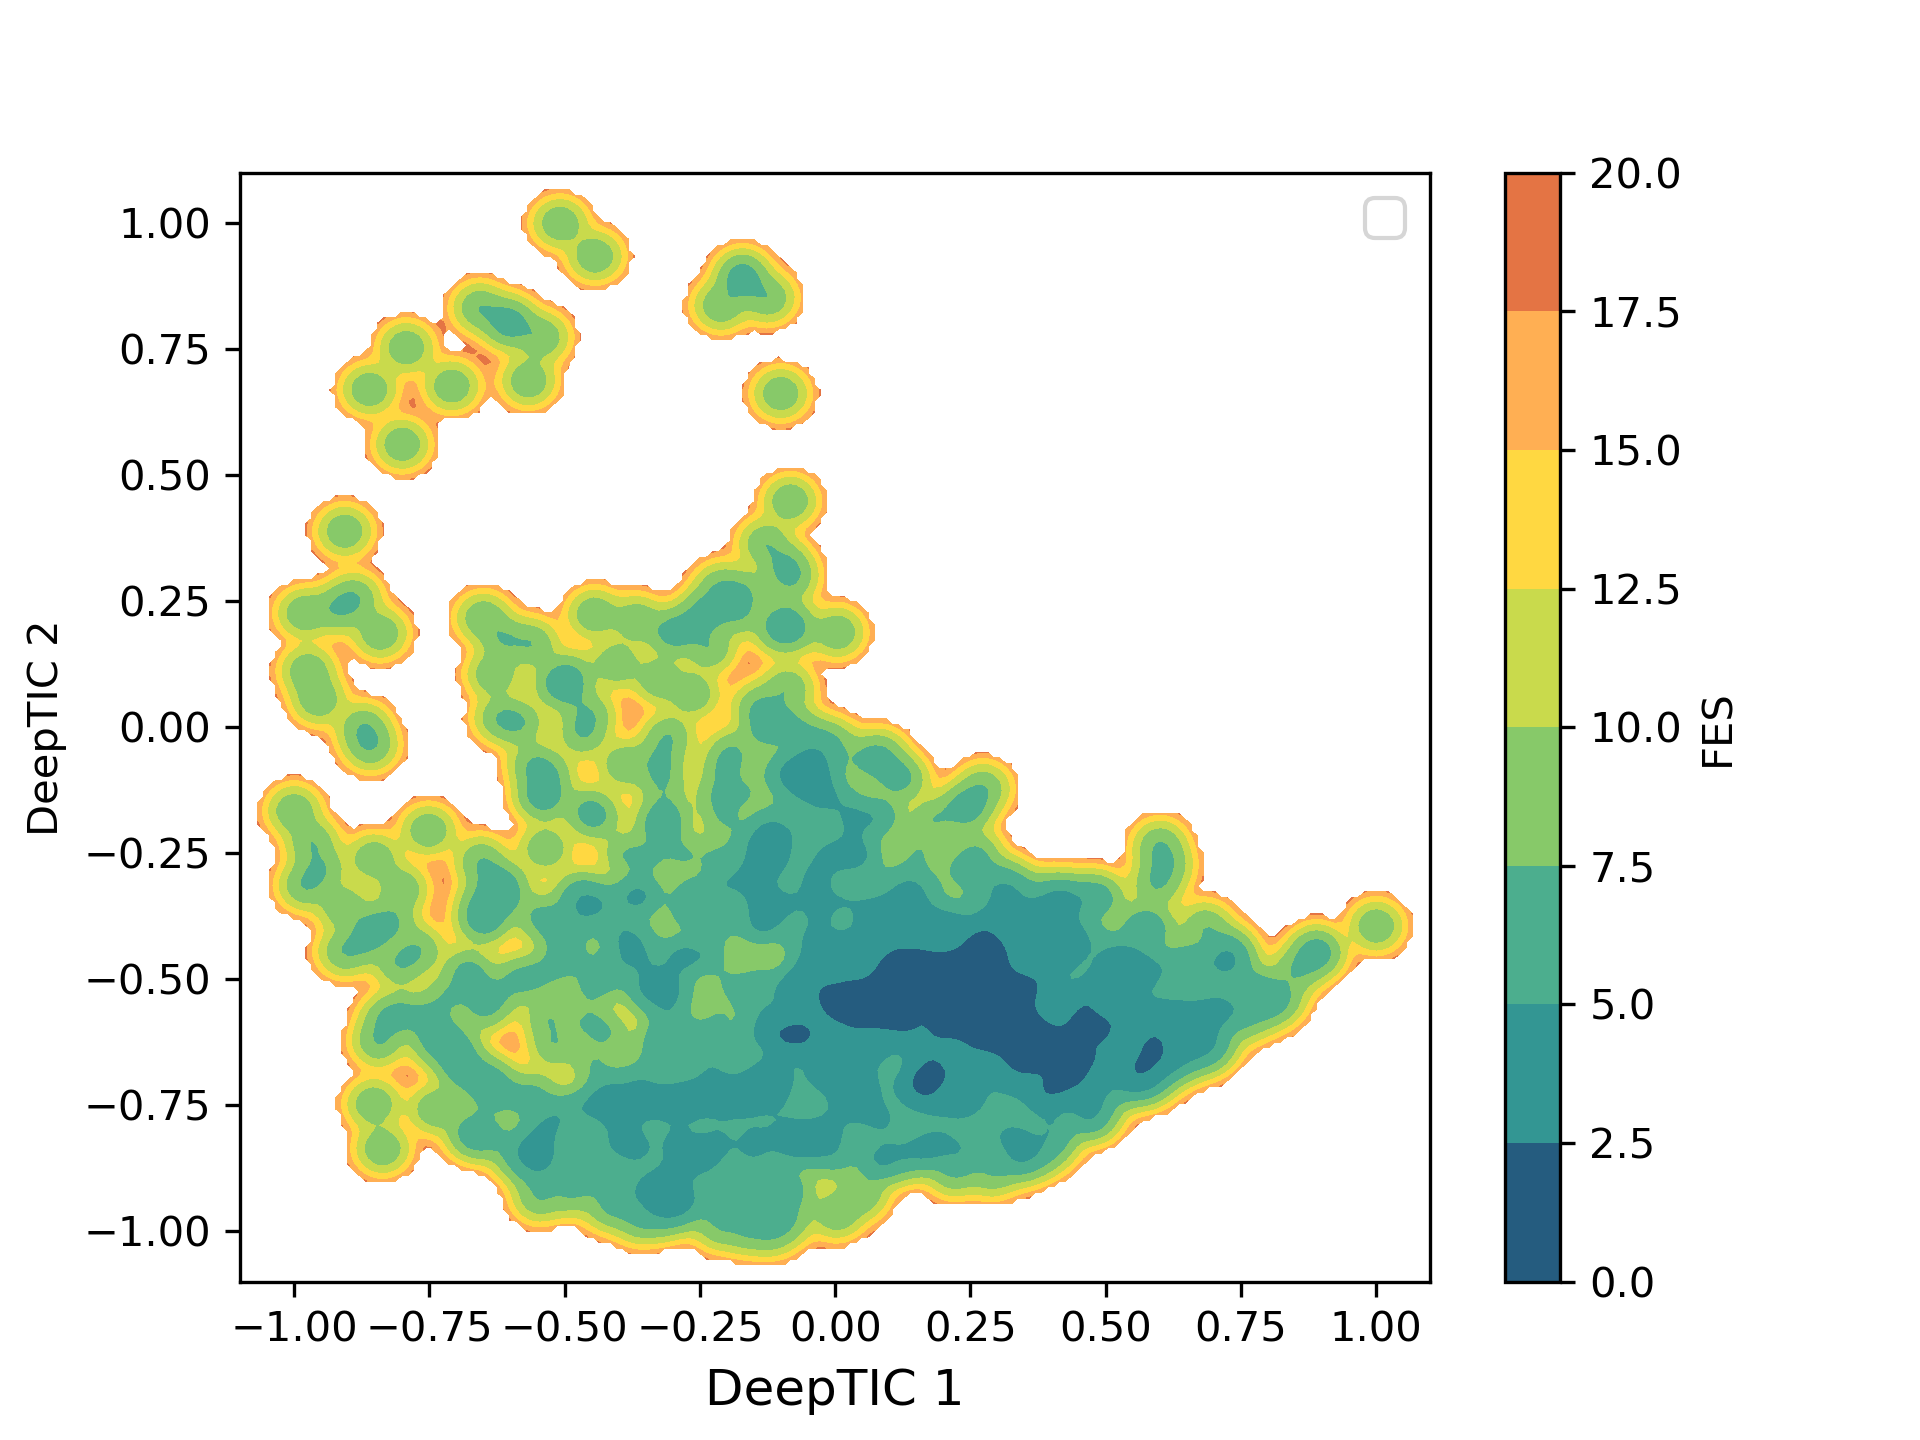

In [6]:
show_results('torsions', 'deep_tica')